# Transformations of Space

We now make the jump from two to three dimensions. We generalize every notion we saw in the previous notebook, and consider several new ones. Our chief goal is the construction of rotation matrices. We begin with the illustration of a vector $a=(a_x,a_y,a_z)$ in space with respect to a given right-handed orthogonal coordinate system $(e_x,e_y,e_z)$. **Orthogonal** means that the vectors are mutually perpendicular, while **right-handed** means that if, with your right hand, you align your index finger with $e_x$ and your middle finger with $e_y$ then your thumb will align with $e_z$.

We introduce the **spherical coordinates**

\begin{equation}\label{eq:scon}
  \eqalign{
  \theta &= \hbox{ polar angle } = \angle(e_z,a), \hskip 0.5in 0\le\theta<\pi \cr
  \phi &= \hbox{ azimuthal angle } = \angle(e_x,a^{\flat}), \hskip 0.5in 0\le\phi<2\pi \cr
  r &= \hbox{ magnitude } = \|a\| = \sqrt{a_x^2+a_y^2+a_z^2}, \cr}
\end{equation}

where $a^{\flat}=(a_x,a_y,0)$ is the flattening of $a$ into the $(e_x,e_y)$ plane. In these coordinates we express

\begin{equation}\label{eq:ascon}
  \eqalign{
  a_x &= r\sin(\theta)\cos(\phi) \cr
  a_y &= r\sin(\theta)\sin(\phi) \cr
  a_z &= r\cos(\theta) \cr}
\end{equation}


<IPython.core.display.Javascript object>


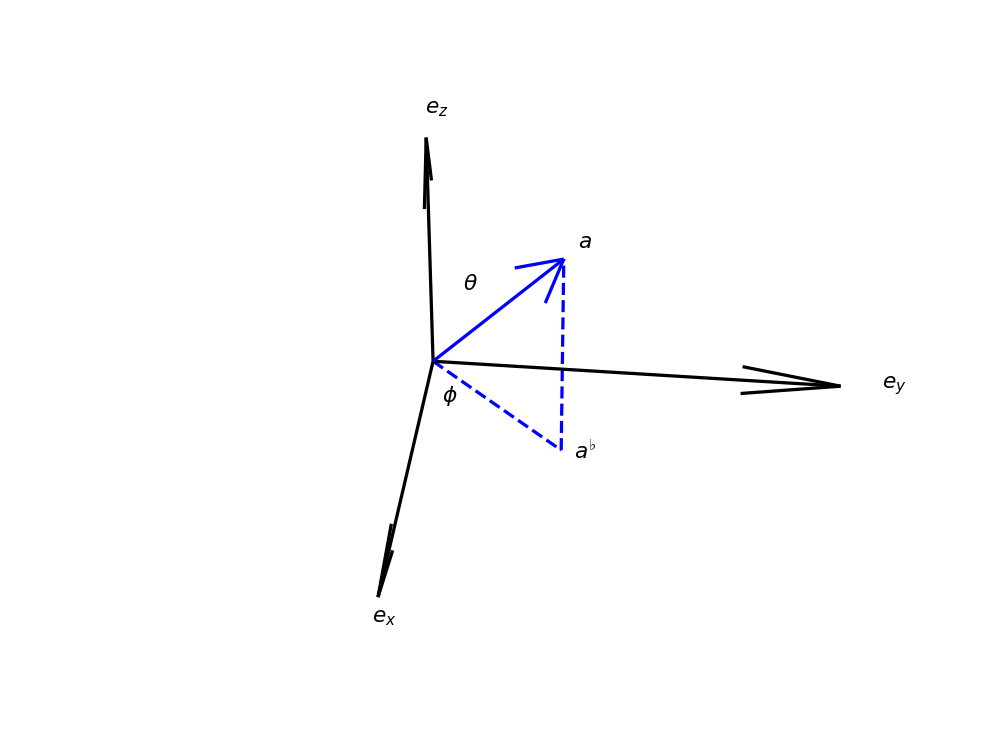

In [3]:
# spherical coordinates
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

theta = np.pi/6
phi = np.pi/4
r = 2
x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

ax.quiver(0,0,0,x,y,z, colors='b', arrow_length_ratio=.25)
ax.text3D(1.1*x, 1.1*y, 1.1*z, '$a$')

ex = np.array([2,0,0])
ey = np.array([0,2,0])
ez = np.array([0,0,2])
ax.quiver([0,0,0],[0,0,0],[0,0,0],ex,ey,ez, colors='k', arrow_length_ratio=.25)

tex = 1.1*ex
ax.text3D(tex[0], tex[1], tex[2], '$e_x$')
tey = 1.1*ey
ax.text3D(tey[0], tey[1], tey[2], '$e_y$')
tez = 1.1*ez
ax.text3D(tez[0], tez[1], tez[2], '$e_z$')

ax.plot3D([0, x], [0, y], [0,0], 'b--')
ax.text3D(1.1*x, 1.1*y, 0, '$a^{\\flat}$')
ax.plot3D([x, x], [y, y], [0,z], 'b--')

ax.text3D(x/4, y/4, z/2, '$\\theta$')
ax.text3D(x/2, y/8, 0, '$\phi$')

ax.set_xlim(-1,2)
ax.set_ylim(-1,2)
ax.set_zlim(-1,2);

ax.axis('off');

\begin{myfig}\label{fig:ascon} Representation of $a\in\maR^3$ in terms of its **polar angle**, $\theta$, **azimuthal angle**, $\phi$, and **magnitude**, $r$. Please rotate, zoom, and repeat. \end{myfig}

## Inner, outer, and cross products

To begin we note the **inner product** of two space vectors remains the sum of their element-wise products. That is

\begin{equation*}
  a^Tb = \begin{bmatrix} a[0] & a[1] & a[2] \end{bmatrix}\begin{bmatrix} a[0] \\ a[1] \\ a[2] \end{bmatrix}
    = a[0]b[0] + a[1]b[1] + a[2]b[2].
\end{equation*}

In addition, the norm of $a$ remains $\|a\|\equiv (a^Ta)^{1/2}$ and the inner product still obeys 

\begin{equation}\label{eq:CSE}
  a^Tb = \|a\|\|b\|\cos(\theta)
\end{equation}

where $\theta\equiv\angle(a,b)$ is the angle between $a$ and $b$.

The word **inner** here is used by contrast with the **outer product**

\begin{equation}\label{eq:OutProd}
     ab^T = \begin{bmatrix} a[0] \\ a[1] \\ a[2] \end{bmatrix}\begin{bmatrix} b[0] & b[1] & b[2] \end{bmatrix}
     = \begin{bmatrix} a[0]b[0] & a[0]b[1] & a[0]b[2] \\ a[1]b[0] & a[1]b[1] & a[1]b[2] \\ a[2]b[0] & a[2]b[1] & a[2]b[2]
     \end{bmatrix}
\end{equation}

We will use both products throughout the remainder of our work. For our immediate needs we examine the outer product of a vector with itself. With $A=aa^T$ we find that

\begin{equation*}
   Ax = aa^Tx = a(a^Tx) = (a^Tx) a
\end{equation*}

and hence $Ax$ is simply a mutiple of $a$. We illustrate the vector $a$, and the plane perpendicular to it, in Figure 1 below.

\begin{exercise}\label{ex:rank1}
Argue that if $a\in\maR^3$ is a unit vector, i.e., $\|a\|=1$, then $A\equiv aa^T$ obeys $A^2=A$. In this case we say that
$A$ is a **projection** of $\maR^3$ onto the line through $a$.
\end{exercise}

Your solution here.

\begin{exercise}\label{ex:rank1p}
Argue that if $a\in\maR^3$ is a unit vector, i.e., $\lVert a\rVert=1$, then $I-aa^T$ is a **projection** of $\maR^3$ onto the plane perpendicular to $a$. Here $I$ denotes the 3-by-3 identity matrix and so $(I-aa^T)x=x-(a^Tx)a$. A vector is perpendicular to $a$ when its
inner product with $a$ vanishes. Hence it remains only to take the inner product of $a$ and $x-(a^Tx)a$.
\end{exercise}

Your solution here.

We will exhibit two methods for displaying (finite sections) of infinite planes in python. The first, coded in the cell below, uses *meshgrid* to create a grid of planar points and then builds a plane as the height of a linear function of these grid points - where the linear function is built from the requirement that the plane be perpendicular to a given $a\in\maR^3$.

<IPython.core.display.Javascript object>


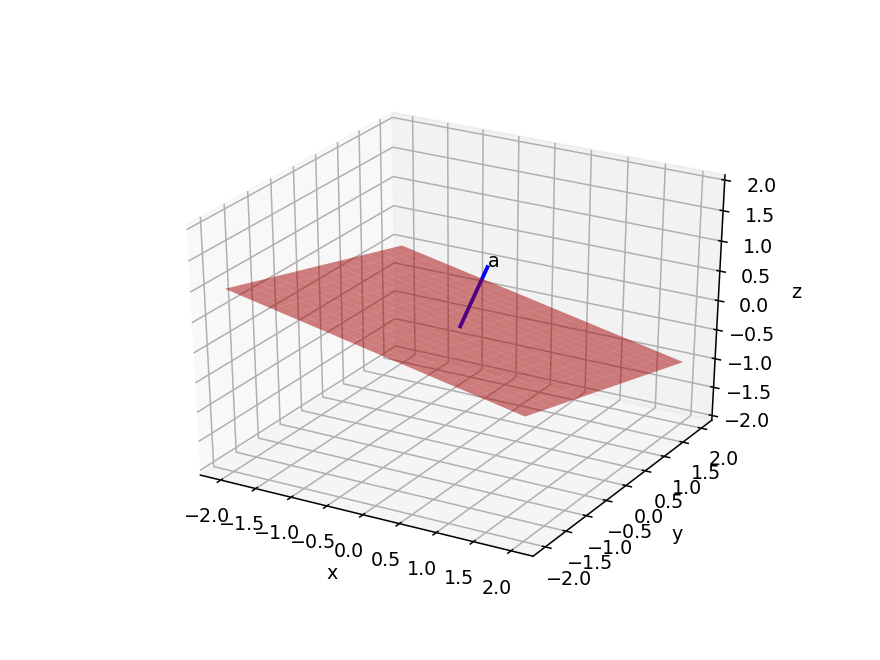

In [82]:
# plotting lines and planes
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

a = np.array([1,1,4])/np.sqrt(18)   # make a unit vector

x = np.linspace(-2,2,20)
y = np.linspace(-2,2,20)
X, Y = np.meshgrid(x, y)   # make an (X,Y) grid on a small square

Z = (-a[0]*X - a[1]*Y)/a[2]  # height of points on plane perp to a

ax.plot3D([0, a[0]], [0, a[1]], [0, a[2]],'b',linewidth=2)   # plot the a vector
ax.text3D(a[0], a[1], a[2], 'a')                             # label the a vector
ax.plot_surface(X, Y, Z, alpha=0.5, color='r')   # plot the plane perp to a

ax.grid('on')
ax.set_zlim(-2,2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

\begin{myfig}\label{fig:vperp} A unit vector and its perpendicular plane. \end{myfig}

There is a third way of computing the product of two
vectors in $\maR^3$ that is especially important to studies of angular motion. The 
**cross product**  of $u$ and $v$ is written
$u\times v$ and defined as the matrix vector product


\begin{equation}\label{eq:Xdef}
  u\times v \equiv \ttX(u)v =
  \begin{pmatrix} 0 & -u_2 & u_1 \\
                  u_2 & 0 & -u_0 \\
                  -u_1 & u_0 & 0 \end{pmatrix}
  \begin{pmatrix} v_0 \\ v_1 \\ v_2 \end{pmatrix}
  = \begin{pmatrix} -u_2v_1 + u_1v_2 \\ u_2v_0-u_0v_2 \\ -u_1v_0+u_0v_1 
    \end{pmatrix}  
\end{equation}

\begin{exercise}\label{ex:CP0}
(a) Show that $u^T(u\times v)=0$ and $v^T(u\times v)=0$ and conclude that $u\times v$ is perpendicular to the plane containing $u$ and $v$.

(b) Confirm that $\ttX(u)^T=-\ttX(u)$ and that $\ttX(u)^2=uu^T-\|u\|^2I$.

(c) Use (b) to derive
$
  \|u\times v\|^2 = \|u\|^2\|v\|^2 - (u^Tv)^2.
$

(d) If $\theta$ is the angle between $u$ and $v$ use (c) and (\ref{eq:CSE}) to show that
$
  \|u\times v\| = \|u\|\|v\||\sin\theta|.
$

(e) Use (d) and the figure below to conclude that 
$\|u\times v\|$
is the area (base times height) of the parallelogram with sides $u$ and $v$.

(f) Use (e) and the figure below to conclude that $|w^T(u\times v)|$
is the volume (area of base times height) of the parallelepiped with 
sides $u,\ v$ and $w$. Hint: Let $u$ and $v$ define the base. Then
$u\times v$ is parallel to the height vector obtained by drawing
a perpendicular from $w$ to the base.

(g) Based on our work in the previous notebook we note that this parallelepiped is the image of the unit cube by the transformation

\begin{equation*}
 A = [u, v, w] = \begin{bmatrix} u_0 & v_0 & w_0 \\ u_1 & v_1 & w_1 \\ u_2 & v_2 & w_2 \end{bmatrix}
\end{equation*}

As this image has volume $|w^T(u\times v)|$, if the determinant indeed measures volume change (as it did in the plane) then $\det(A)=w^T(u\times v)$ should tell us how to compute the determinant of $A$. Please confirm that $u\times v$ is a 
sequence of planar determinants and that $w^T(u\times v)$ is precisely the **column expansion** down column 2;

\begin{equation} \label{eq:det3}
  \det(A) = \sum_{i=0}^2 A[i,2](-1)^i\det(A[!i,!2])
\end{equation}

where $A[!i,!2]$ is the 2-by-2 submatrix of $A$ obtained by *excluding* row $i$ and column $2$.

\end{exercise}

Your solution here.

\begin{exercise}\label{ex:cpdet3}
Given

\begin{equation*}
 u = \begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix}, \hskip 0.25in
 v = \begin{bmatrix} 2 \\ 1 \\ 1 \end{bmatrix}, \hskip 0.25in
 w = \begin{bmatrix} 1 \\ 1 \\ 2 \end{bmatrix}
\end{equation*}

(a) Compute $u\times v$ by hand, via (\ref{eq:Xdef}), and check your work in python using np.cross(u,v)

(b) Compute $\det(A)$ by hand, via (\ref{eq:det3}), and check your work in python using np.linalg.det(A)


\end{exercise}

Your solution here.

<IPython.core.display.Javascript object>


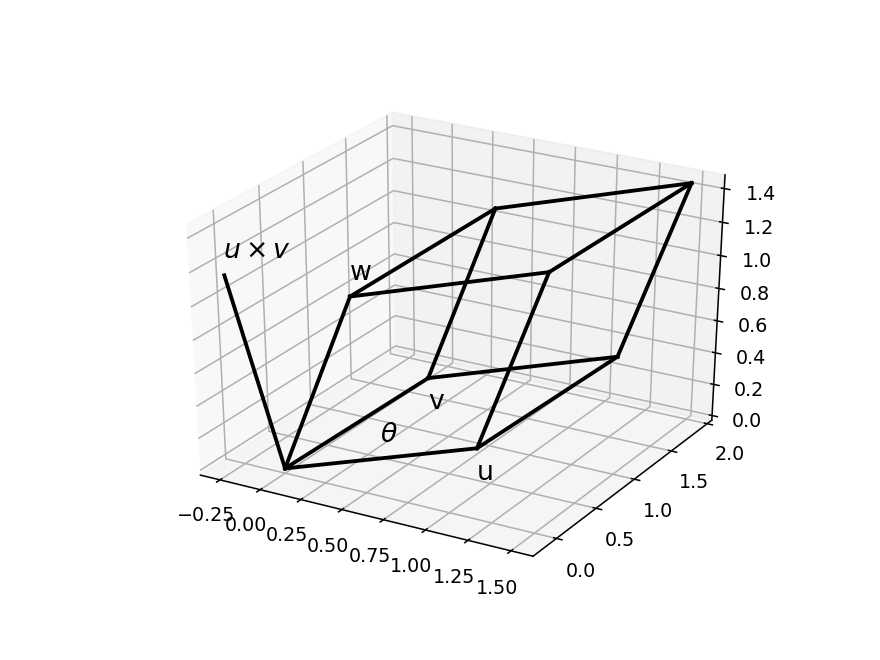

In [56]:
# cross product illustration
%matplotlib notebook
from mpl_toolkits import mplot3d
import numpy as np                 # import math functions
import matplotlib.pyplot as plt    # import plot functions

fig = plt.figure(' ')
ax = plt.axes(projection="3d")

x = np.array([1,1/3,1/4])

y = np.array([1/4,5/4,1/5])

xcy = np.cross(x.T,y.T);

z = x + y;

ax.plot3D([0, x[0]],[0, x[1]],[0, x[2]],'k',linewidth=2)

ax.text3D(x[0],x[1],x[2]-.2,'u',fontsize=14)
ax.text3D(y[0],y[1],y[2]-.2,'v',fontsize=14)
ax.text3D(y[0],y[1]-.6,y[2]-.2,'$\\theta$',fontsize=14)

ax.plot3D([0, y[0]],[0, y[1]],[0, y[2]],'k',linewidth=2)
ax.plot3D([y[0], z[0]],[y[1], z[1]],[y[2], z[2]],'k',linewidth=2)
ax.plot3D([x[0], z[0]],[x[1], z[1]],[x[2], z[2]],'k',linewidth=2)

ax.plot3D([0, xcy[0]],[0, xcy[1]],[0, xcy[2]],'k',linewidth=2)
ax.text3D(xcy[0],xcy[1],xcy[2]+.1,'$u\\times v$',fontsize=14)

w = np.array([1/4, 1/3, 1])
ax.plot3D([0, w[0]],[0, w[1]],[0, w[2]],'k',linewidth=2)
ax.text3D(w[0],w[1],w[2]+.1,'w',fontsize=14)
ax.plot3D([x[0], x[0]+w[0]],[x[1], x[1]+w[1]],[x[2], x[2]+w[2]],'k',linewidth=2)
ax.plot3D([y[0], y[0]+w[0]],[y[1], y[1]+w[1]],[y[2], y[2]+w[2]],'k',linewidth=2)
ax.plot3D([z[0], z[0]+w[0]],[z[1], z[1]+w[1]],[z[2], z[2]+w[2]],'k',linewidth=2)
ax.plot3D([w[0], x[0]+w[0]],[w[1], x[1]+w[1]],[w[2], x[2]+w[2]],'k',linewidth=2)
ax.plot3D([w[0], y[0]+w[0]],[w[1], y[1]+w[1]],[w[2], y[2]+w[2]],'k',linewidth=2)
ax.plot3D([y[0]+w[0], z[0]+w[0]],[y[1]+w[1], z[1]+w[1]],[y[2]+w[2], z[2]+w[2]],'k',linewidth=2)
ax.plot3D([x[0]+w[0], z[0]+w[0]],[x[1]+w[1], z[1]+w[1]],[x[2]+w[2], z[2]+w[2]],'k',linewidth=2);

\begin{myfig}\label{fig:crossp} The geometry of the cross product. We note that $u\times v$ is perpendicular to the plane defined by $u$ and $v$. The actual *direction* of $u\times v$ is uniquely specified by the **right hand rule:** If, on your right hand, $u$ aligns with your index finger $v$ with your middle finger, then $u\times v$ will align with your thumb. \end{myfig}

Our cross product illustration looks like three shears

\begin{equation*}
 N_{yz}(\s) = \begin{bmatrix} 
       1 & 0 & 0 \\ 0 & 1 & \s \\  0 & 0 & 1\end{bmatrix}, \hskip 0.25in
 N_{zx}(\s) = \begin{bmatrix} 
         1 & 0 & 0 \\  0 & 1 & 0 \\ \s & 0 & 1\end{bmatrix}, \hskip 0.25in
 N_{xy}(\s) = \begin{bmatrix} 
       1 & \s & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
\end{equation*}

<IPython.core.display.Javascript object>


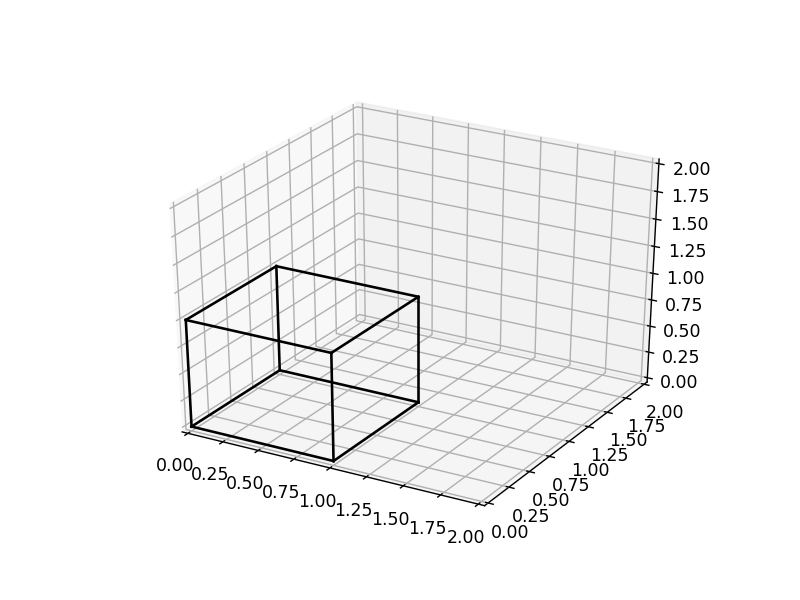

interactive(children=(FloatSlider(value=0.0, description='sigma', max=1.0, step=0.05), Output()), _dom_classes…

In [9]:
# 3D Shear Widget
%matplotlib notebook
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(' ')

ax = plt.axes(projection="3d")    # set up for 3D work

V = np.array([[0,1,1,0,0,1,1,0],[0,0,1,1,0,0,1,1],[0,0,0,0,1,1,1,1]])   # 8 vertices
    
Vorder = [[0,1],[1,2],[2,3],[3,0],[0,4],[4,5],[5,1],[5,6],[6,2],[6,7],[7,3],[7,4]]
              
E0, = ax.plot3D(V[0,Vorder[0]],V[1,Vorder[0]],V[2,Vorder[0]],'k')
E1, = ax.plot3D(V[0,Vorder[1]],V[1,Vorder[1]],V[2,Vorder[1]],'k')
E2, = ax.plot3D(V[0,Vorder[2]],V[1,Vorder[2]],V[2,Vorder[2]],'k')
E3, = ax.plot3D(V[0,Vorder[3]],V[1,Vorder[3]],V[2,Vorder[3]],'k')
E4, = ax.plot3D(V[0,Vorder[4]],V[1,Vorder[4]],V[2,Vorder[4]],'k')
E5, = ax.plot3D(V[0,Vorder[5]],V[1,Vorder[5]],V[2,Vorder[5]],'k')
E6, = ax.plot3D(V[0,Vorder[6]],V[1,Vorder[6]],V[2,Vorder[6]],'k')
E7, = ax.plot3D(V[0,Vorder[7]],V[1,Vorder[7]],V[2,Vorder[7]],'k')
E8, = ax.plot3D(V[0,Vorder[8]],V[1,Vorder[8]],V[2,Vorder[8]],'k')
E9, = ax.plot3D(V[0,Vorder[9]],V[1,Vorder[9]],V[2,Vorder[9]],'k')
E10, = ax.plot3D(V[0,Vorder[10]],V[1,Vorder[10]],V[2,Vorder[10]],'k')
E11, = ax.plot3D(V[0,Vorder[11]],V[1,Vorder[11]],V[2,Vorder[11]],'k')

ax.set_xlim([0,2])
ax.set_ylim([0,2])
ax.set_zlim([0,2])
plt.grid('on')

def update( sigma=widgets.FloatSlider(min=0, max=1, step=0.05, value=0) ):
    
    Nxz = np.array([[1,0,sigma],[0,1,0],[0,0,1]])
    Nyz = np.array([[1,0,0],[0,1,sigma],[0,0,1]])
    NV = Nyz@Nxz@Nxz.T@V
    E0.set_data_3d(NV[0,Vorder[0]],NV[1,Vorder[0]],NV[2,Vorder[0]])
    E1.set_data_3d(NV[0,Vorder[1]],NV[1,Vorder[1]],NV[2,Vorder[1]])
    E2.set_data_3d(NV[0,Vorder[2]],NV[1,Vorder[2]],NV[2,Vorder[2]])
    E3.set_data_3d(NV[0,Vorder[3]],NV[1,Vorder[3]],NV[2,Vorder[3]])
    E4.set_data_3d(NV[0,Vorder[4]],NV[1,Vorder[4]],NV[2,Vorder[4]])
    E5.set_data_3d(NV[0,Vorder[5]],NV[1,Vorder[5]],NV[2,Vorder[5]])
    E6.set_data_3d(NV[0,Vorder[6]],NV[1,Vorder[6]],NV[2,Vorder[6]])
    E7.set_data_3d(NV[0,Vorder[7]],NV[1,Vorder[7]],NV[2,Vorder[7]])
    E8.set_data_3d(NV[0,Vorder[8]],NV[1,Vorder[8]],NV[2,Vorder[8]])
    E9.set_data_3d(NV[0,Vorder[9]],NV[1,Vorder[9]],NV[2,Vorder[9]])
    E10.set_data_3d(NV[0,Vorder[10]],NV[1,Vorder[10]],NV[2,Vorder[10]])
    E11.set_data_3d(NV[0,Vorder[11]],NV[1,Vorder[11]],NV[2,Vorder[11]])

    fig.canvas.draw_idle()

interact(update);

\begin{myfig}\label{fig:3shear} Shear the cube. \end{myfig}

## Rotations

To prepare for rotations in space we consider the planar rotations of the previous notebook from a more analytical viewpoint.  In particular, with reference to Figure \ref{fig:rot2}, we observe that

\begin{equation} \label{eq:xycirc}
  x_0(\theta) = r\cos(\theta), \\
  x_1(\theta) = r\sin(\theta)
\end{equation}

traces out a circle of radius $r$ in the $(x_0,x_1)$ plane as $\theta$ travels from 0 to $2\pi$. On differentiating this pair with respect to $\theta$ we arrive at the tangent vector with components

\begin{equation} \label{eq:circtan}
  x'_0(\theta) = -r\sin(\theta), \\
  x'_1(\theta) = r\cos(\theta)
\end{equation}

This vector is most naturally illustrated when translated to the point at which it is tangent.

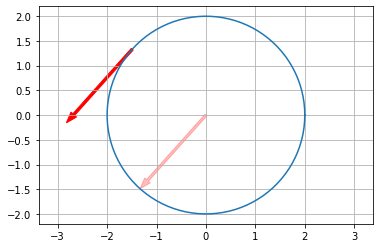

In [3]:
# planar rotation with tangent
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi,100)
r = 2

x0 = r*np.cos(theta)
x1 = r*np.sin(theta)
plt.plot(x0, x1)

dx0 = -r*np.sin(theta)
dx1 = r*np.cos(theta)

m = np.random.randint(100)

plt.arrow(x0[m], x1[m], dx0[m], dx1[m], width=0.05, color='r', length_includes_head=True)
plt.arrow(0, 0, dx0[m], dx1[m], width=0.05, color='r', alpha=0.25, length_includes_head=True)
plt.grid('on')
plt.axis('equal');

\begin{myfig}\label{fig:rot2} At a random point on the blue circle we graph the tangent vector, $x'$, in light red, and it's parallel translate, $x+x'$, in dark red. Rerun to see new tangent.\end{myfig}

\begin{exercise}\label{ex:gtan}
Please confirm that $\|x(\theta)\|=r$, and $\|x'(\theta)\|=r$ and $x^T(\theta)x'(\theta)=0$ for each $0\le\theta <2\pi$.
\end{exercise}

We next note that the elements of $x'$ are the transformed elements of $x$, i.e.,

\begin{equation}\label{eq:rot2b}
  x'(\theta) = Sx(\theta), \where S = \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix}
\end{equation}

By analogy with the scalar case we expect that the solution of (\ref{eq:rot2b}) to be

\begin{equation}\label{eq:rot2c}
  x(\theta) = \exp(\theta S)x(0)
\end{equation}

where

\begin{equation}\label{eq:TayExp}
   \exp(\theta) = I + \theta S + (\theta S)^2/2! + (\theta S)^3/3! + (\theta S)^4/4! + (\theta S)^5/5! + \cdots
\end{equation}

where $I$ is the 2-by-2 identity matrix. This is in general a very complicated sum. But as our $S$ has very simple powers

\begin{exercise}\label{ex:S2pow}
Please show that
\begin{equation*}
  S^{2m-1} = (-1)^{m+1}S  \and S^{2m} = (-1)^mI \hskip 0.25in m=1,2,\ldots
\end{equation*}
and deduce that
\begin{equation*}
  \eqalign{
   \exp(\theta S) &= I + \theta S - \theta^2 I/2! + \theta^3 S/3! + \theta^4 I/4! - \theta^5 S/5! + \cdots \cr
      &= (1 - \theta^2/2! + \theta^4/4! - \cdots)I + (\theta - \theta^3/3! + \theta^5/5! - \cdots)S \cr
      &= \cos(\theta)I + \sin(\theta)S \cr
      &= K(\theta) \hskip{0.25in}\hbox{from our previous notebook.}\cr}
\end{equation*}
\end{exercise}

To **recap** our return to planar rotations we have found that 

\begin{equation}\label{eq:expS2}
  \boxed{K(\theta)=\exp(\theta S)}
\end{equation}

where $S$ is the matrix that transforms points to tangents along the circle of rotation. This will be our clue to exploring rotations in space. Given a unit vector $a\in\maR^3$ and vector $x\in\maR^3$ we illustrate in Figure \ref{fig:3drot} the counterclockwise rotation of $x$ about $a$ by angle $\theta$, together with its tangent vector.

<IPython.core.display.Javascript object>


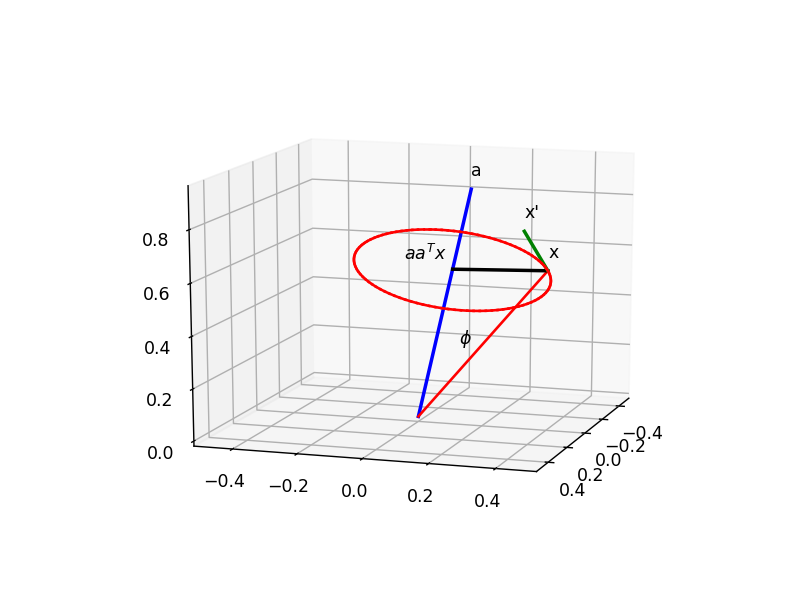

In [1]:
# an illustration of rotation about an axis
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work
ax.view_init(elev = 14, azim = 18)

a = np.array([1,1,4])/np.sqrt(18)   # make a unit vector
A = np.outer(a,a)
I = np.eye(3)
X = np.array([[0, -a[2], a[1]],[a[2], 0, -a[0]], [-a[1], a[0], 0]])   # the cross product matrix

ax.plot3D([0, a[0]], [0, a[1]], [0, a[2]],'b',linewidth=2)   # plot the a vector
ax.text3D(a[0], a[1], a[2]+0.05, 'a')                             # label the a vector

x = np.array([0,2,3])/5
ax.plot3D([0, x[0]], [0, x[1]], [0, x[2]],'r')   # plot the x vector
ax.text3D(x[0], x[1], x[2]+.05, 'x')                             # label the x vector

Ax = A@x
ax.plot3D([Ax[0], x[0]], [Ax[1], x[1]], [Ax[2], x[2]], 'k',linewidth=2)   # plot the A*x vector
ax.text3D(Ax[0], Ax[1]-.15, Ax[2]+0.025, '$aa^Tx$')   # label the A*x vector

dx = np.cross(a, x)
ax.plot3D([x[0], x[0]+dx[0]], [x[1], x[1]+dx[1]], [x[2], x[2]+dx[2]], 'g',linewidth=2)   # plot the dx vector
#ax.arrow3D(x[0], x[1], x[2], dx[0], dx[1], dx[2], width=0.05, color='g', length_includes_head=True)   # plot the dx vector
ax.text3D(x[0]+dx[0], x[1]+dx[1], x[2]+dx[2]+0.05, "x'")   # label the dx vector

p = (Ax + x)/4
ax.text3D(p[0], p[1], p[2], '$\phi$')   # label phi

Theta = np.linspace(0,2*np.pi,100)

y = x  # temp storage

for theta in Theta:
    K = A + np.sin(theta)*X + np.cos(theta)*(I-A)    # the rotation matrix
    newy = K@x
    ax.plot3D([y[0], newy[0]], [y[1], newy[1]], [y[2], newy[2]],'r')   # connect old to new
    y = newy

ax.grid('on')
ax.set_xlim(-.5, .5)
ax.set_ylim(-.5, .5);

\begin{myfig}\label{fig:3drot} An axis defined by a blue unit vector, $a$. We choose a red vector $x$ that makes the angle $\phi$ with $a$. We rotate $x$ about $a$ and trace out the red circle centered at $aa^Tx$ (the projection of $x$ onto $a$).
At $x$ we also plot the black normal (radial) vector to the circle and the green tangent vector, $x'$. \end{myfig}

We learn from this figure that the tangent vector, $x'$, is perpendicular to the plane spanned by $a$ and $x$, obeys the right-hand-rule, and that its length is $\|x\|\sin(\phi)$. As such, the tangent vector at $x$ is the cross product of $a$ and $x$. That is,

\begin{equation*}
  x'(\theta) = a\times x = X(a)x
\end{equation*}

and **so $X(a)$ is the matrix that transforms points to tangents during a rotation.** Based on (\ref{eq:expS2}) we therefore expect the associated rotation matrix to be

\begin{equation*}
  K(a,\theta) \equiv \exp(\theta X(a)) = I + \theta X(a) + (\theta X(a))^2/2 + (\theta X(a))^3/3! + (\theta X(a))^4/4! + \cdots
\end{equation*}

Now, thanks to Exercise \ref{ex:CP0} we know that powers of $X(a)$ divide neatly between even and odd that in turn reveal $\sin(\theta)$ and $\cos(\theta)$.

\begin{exercise}\label{ex:expXa}
Please show that
\begin{equation*}
  X(a)^{2m-1} = (-1)^{m+1}X(a) \and X(a)^{2m} = (-1)^m(I - aa^T) \hskip 0.25in m=1,2,\ldots
\end{equation*}
and so
\begin{equation*}
  K(a,\theta) = \exp(\theta X(a)) 
  = I + \sin(\theta)X(a) + (\cos(\theta)-1)(I-aa^T) 
  = aa^T + \sin(\theta)X(a) + \cos(\theta)(I-aa^T)
\end{equation*}
\end{exercise}

This deserves a box. The counterclockwise rotation by $\theta$ about the unit-length axis $a\in\maR^3$ is

\begin{equation}\label{eq:Kat}
  \boxed{K(a,\theta) = aa^T + \sin(\theta)X(a) + \cos(\theta)(I-aa^T)}
\end{equation}


Let us produce these matrices when $a$ is one of the coordinate axes

\begin{equation*}
 e_x = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \hskip 0.25in
 e_y = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}, \hskip 0.25in
 e_z = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{equation*}


\begin{exercise}\label{ex:Rot3euc}
Please confirm that

\begin{equation}\label{eq:Kax}
 K(e_x,\theta) = \begin{bmatrix} 
       1 & 0 & 0 \\ 0 & \cos(\theta) & -\sin(\theta) \\  0 & \sin(\theta) & \cos(\theta)\end{bmatrix}, \hskip 0.25in
 K(e_y,\theta) = \begin{bmatrix} 
         \cos(\theta) & 0 & \sin(\theta) \\  0 & 1 & 0 \\ -\sin(\theta) & 0 & \cos(\theta)\end{bmatrix}, \hskip 0.25in
 K(e_z,\theta) = \begin{bmatrix} 
       \cos(\theta) & -\sin(\theta) & 0 \\ \sin(\theta) & \cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix}
\end{equation}

and in each case show that its determinant, via Equation \ref{eq:det3}, is 1 and its trace is $1+2\cos\theta$.

\end{exercise}

Your solution here.

These coordinate rotations, (\ref{eq:Kax}), indeed have the look of the planar rotations of our previous notebook. Let's now show that $K(a,\theta)$ indeed leaves $a$ unmolested, that its transpose reverses the rotation, that composite rotations correspond to sums of angles,
and that it preserves length (norm) and angle (with respect to $a$).


\begin{exercise}\label{ex:Rot3a}
Use Exercise (\ref{ex:CP0}) to conclude that 

(i) $K(a,\theta)a = a$

(ii) $K(a,\theta)^T = K(a,-\theta)$

(iii) $K(a,\theta)K(a,\phi)=K(a,\theta+\phi)$

(iv) $\|K(a,\theta)x\| = \|x\|$, for each $x\in\maR^3$ and $\theta\in(0,2\pi)$.

(v) $\angle(a,x)=\angle(a,K(a,\theta)x)$, for each $x\in\maR^3$ and $\theta\in(0,2\pi)$.
\end{exercise}

Your solution here.

We could "see" the trace of each coordinate rotation, (\ref{eq:Kax}), without trouble, and found it to be independent of direction. Using $\|a\|=1$ and that the trace of a sum is the sum of the traces please

\begin{exercise}\label{ex:trKa} Show that $\tr(K(a,\theta))=1+2\cos(\theta)$
\end{exercise}

Your solution here.

Although we could also see that determinant of each coordinate rotation was 1, the form of $K(a,\theta)$ as the sum (\ref{eq:Kat}), is not conducive to evaluation of the determinant. Recalling, from our previous notebook, that the determinant of a product is the product of determinants we now show  that $K(a,\alpha)$ can be written as a product of coordinate rotations. 

We write the axis, $a$, in spherical coordinates

\begin{equation}\label{eq:asc}
  a = (\sin(\theta)\cos(\phi), \sin(\theta)\sin(\phi), \cos(\theta))
\end{equation}

an reason that to achieve $K(a,\alpha$) we

\begin{itemize}
\item rotate $a$ onto $e_z$ (rotate $a$ around $e_z$ by $-\phi$, then rotate around $e_y$ by $-\theta$)
\item rotate around $e_z$ by $\alpha$
\item undo the initial transformation, i.e, rotate around $e_y$ by $\theta$, then rotate around $e_z$ by $\phi$.
\end{itemize}

In symbols, this reads

\begin{equation}\label{eq:K5}
  \boxed{K(a,\alpha) = K(e_z,\phi)K(e_y,\theta)K(e_z,\alpha)K(e_y,-\theta)K(e_z,-\phi)}
\end{equation}

\begin{exercise}\label{ex:rot2way} With $\theta=\phi=\pi/4$ we find $a=(1/2,1/2,1/\sqrt 2)$. Compute $K(a,\alpha)$ via
(\ref{eq:Kat}) and (\ref{eq:K5}) and confirm their identity.
\end{exercise}


Your solution here.

Our next application of this tool will be to map one right-handed cartesian frame, $(e_x,e_y,e_z)$, to another, $(e_1,e_2,e_3)$. We illustrate these two frames in Figure \ref{fig:EulerAngles}.

<IPython.core.display.Javascript object>


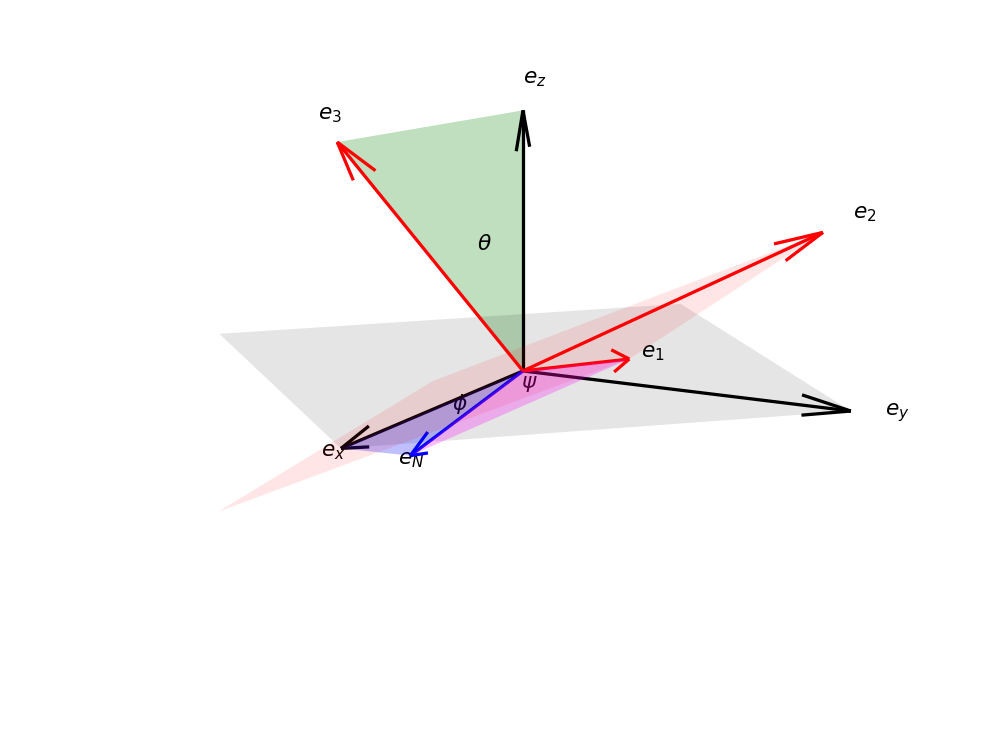

In [32]:
# transformation of frames
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

%matplotlib notebook

fig = plt.figure(' ')
ax = fig.gca(projection='3d')

ex = np.array([1,0,0])
ey = np.array([0,1,0])
ez = np.array([0,0,1])

F1 = ax.quiver([0,0,0],[0,0,0],[0,0,0],ex,ey,ez, colors='k', arrow_length_ratio=.15)

# create the e plane 
x = [ex[0], ey[0], -ex[0], -ey[0]]   
y = [ex[1], ey[1], -ex[1], -ey[1]]   
z = [ex[2], ey[2], -ex[2], -ey[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'k', alpha = 0.1))

tex = 1.1*ex
ax.text3D(tex[0], tex[1], tex[2], '$e_x$')
tey = 1.1*ey
ax.text3D(tey[0], tey[1], tey[2], '$e_y$')
tez = 1.1*ez
ax.text3D(tez[0], tez[1], tez[2], '$e_z$')

e1 = np.array([1,1,0.5])/np.sqrt(2.25)
e2 = np.array([-1,1,0.75])/np.sqrt(2+9/16)
e3 = np.cross(e1, e2)
e3 = e3 / np.linalg.norm(e3)

F2 = ax.quiver([0,0,0],[0,0,0],[0,0,0],
               [e1[0], e2[0], e3[0]],[e1[1], e2[1], e3[1]], [e1[2], e2[2], e3[2]], colors='r', arrow_length_ratio=.15)

# create the f plane 
x = [e1[0], e2[0], -e1[0], -e2[0]]   
y = [e1[1], e2[1], -e1[1], -e2[1]]   
z = [e1[2], e2[2], -e1[2], -e2[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolor='r', alpha = 0.1))
#set_edgecolor(fp, '')

te1 = 1.1*e1
ax.text3D(te1[0], te1[1], te1[2], '$e_1$')
te2 = 1.1*e2
ax.text3D(te2[0], te2[1], te2[2], '$e_2$')
te3 = 1.1*e3
ax.text3D(te3[0], te3[1], te3[2], '$e_3$')

eN = np.cross(ez, e3)
eN = eN / np.linalg.norm(eN)
F3 = ax.quiver(0,0,0,eN[0], eN[1], eN[2], colors='b', arrow_length_ratio=.15)
teN = 1.1*eN
ax.text3D(teN[0], teN[1], teN[2], '$e_N$')

# create the theta span
x = [0, e3[0], ez[0]]  
y = [0, e3[1], ez[1]]  
z = [0, e3[2], ez[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'g', alpha = 0.25))
e3z = (e3 + ez)/4
ax.text3D(e3z[0], e3z[1], e3z[2], '$\\theta$')

# create the phi span
x = [0, ex[0], eN[0]]  
y = [0, ex[1], eN[1]]  
z = [0, ex[2], eN[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = 'b', alpha = 0.25))
e3z = (ex + eN)/4
ax.text3D(e3z[0], e3z[1], e3z[2], '$\phi$')

# create the psi span
x = [0, e1[0], eN[0]]  
y = [0, e1[1], eN[1]]  
z = [0, e1[2], eN[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = [1,0,1], alpha = 0.25))
e3z = (e1 + eN)/4
ax.text3D(e3z[0], e3z[1], e3z[2], '$\psi$')

ax.set_xlim3d([-1.25, 1.25])
ax.set_ylim3d([-1.25, 1.25])
ax.set_zlim3d([-1.25, 1.25])
plt.show()

\begin{myfig}\label{fig:EulerAngles} Please rotate and zoom to explore the three angles between the two frames. The black $(e_x,e_y)$ plane intersects the red $(e_1,e_2)$ plane along the blue
$e_N = e_z\times e_3/\Vert e_z\times e_3\Vert$ direction. We denote by $\phi$ the angle from $e_x$ to $e_N$. We paint this span blue and note, as $e_x$ and $e_N$ lie in the black plane,  that

\begin{equation}\label{eq:EA1}
  e_N = K(e_z,\phi)e_x
\end{equation}

We next denote by $\theta$ the angle from $e_z$ to $e_3$. We paint this span green and note that

\begin{equation}\label{eq:EA2}
  e_3 = K(e_N,\theta)e_z
\end{equation}

We finally denote by $\psi$ the angle from $e_N$ to $e_1$. We paint this span purple and note, as $e_N$ and $e_1$ lie in the red plane, that

\begin{equation}\label{eq:EA3}
  e_1 = K(e_3,\psi)e_N
\end{equation}

\end{myfig}

We collect these individual rotations into the composite

\begin{equation}\label{eq:EATot}
  \cK \equiv K(e_3,\psi)K(e_N,\theta)K(e_z,\phi)
\end{equation}

and establish that $\cK$ indeed transforms $(e_x,e_y,e_z)$ to $(e_1,e_2,e_3)$.

\begin{exercise}\label{ex:EA0} (a) Please confirm that $\cK e_x=e_1$ and $\cK e_z = e_3$. 

(b) Please use $(AB)^T=B^TA^T$ and Exercise \ref{ex:Rot3a} to deduce that $\cK^T\cK = I$.

(c) Use (b) to show that  $\cK e_y$ is a unit vector perpendicular to **both** $e_1$ and $e_3$ and so can only be $e_2$ or $-e_2$.

\end{exercise}

Your solution here.

 ## Robot Arms in Space
 
The PUMA (Programmable Universal Manipulation Arm) is an industrial robotic arm developed by Victor Scheinman at Unimation.

<IPython.core.display.Javascript object>


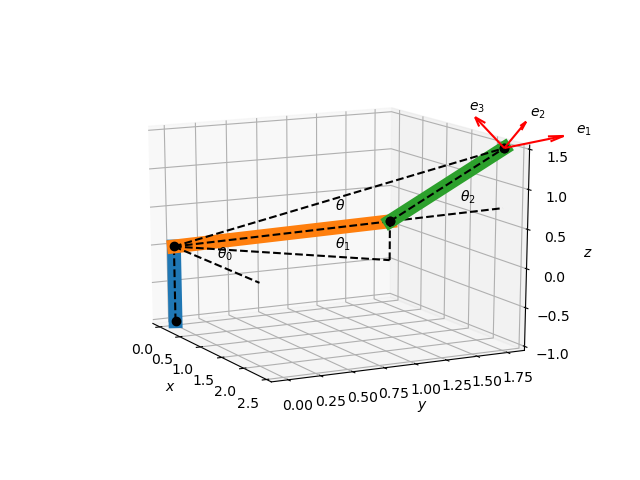

In [117]:
# 6R PUMA
%matplotlib notebook
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

theta0 = np.pi/5
c = np.cos(theta0)
s = np.sin(theta0)
sc = 1.5

ax.plot3D([0,0],[0,0],[-1,0],linewidth=10)
ax.plot3D([0,0],[0,0],[-1, 0],'k--')
ax.plot3D([0],[0],[-1],'ko')

ax.plot3D([0,2*c],[0,2*s],[0, 1/2],linewidth=10)
ax.plot3D([0,sc*2*c],[0,sc*2*s],[0, sc*1/2],'k--')
ax.plot3D([0],[0],[0],'ko')
ax.plot3D([2*c,3*c],[2*s,3*s],[1/2,1.5], linewidth=10)
ax.plot3D([2*c,3*c],[2*s,3*s],[1/2,1.5], 'k--')
ax.plot3D([2*c,2*c], [2*s,2*s],[1/2,1/2],'ko')
ax.plot3D([3*c,3*c], [3*s, 3*s], [3/2, 3/2],'ko')
ax.plot3D([0,3*c],[0,3*s],[0,1.5], 'k--')

# paste a frame at end
e1 = np.array([1,1,0.5])/np.sqrt(2.25)
e2 = np.array([-1,1,0.75])/np.sqrt(2+9/16)
e3 = np.cross(e1, e2)
e3 = e3 / np.linalg.norm(e3)
F2 = ax.quiver([3*c,3*c,3*c],[3*s,3*s,3*s],[3/2,3/2,3/2],
               [e1[0], e2[0], e3[0]],[e1[1], e2[1], e3[1]], [e1[2], e2[2], e3[2]], 
               length=0.5, colors='r', arrow_length_ratio=.25)
te1 = 0.6*e1
ax.text3D(te1[0]+3*c, te1[1]+3*s, te1[2]+3/2, '$e_1$')
te2 = 0.6*e2
ax.text3D(te2[0]+3*c, te2[1]+3*s, te2[2]+3/2, '$e_2$')
te3 = 0.6*e3
ax.text3D(te3[0]+3*c, te3[1]+3*s, te3[2]+3/2, '$e_3$')

ax.plot3D([2*c,2*c], [2*s,2*s],[0,1/2],'k--')
ax.plot3D([0,2*c], [0,2*s],[0,0],'k--')
ax.plot3D([0,2], [0,0],[0,0],'k--')
ax.text3D(0.75,0.1,0,'$\\theta_0$')
ax.text3D(sc*c,sc*s,0.1,'$\\theta_1$')
ax.text3D(sc*c,sc*s,0.6,'$\\theta$')
ax.text3D(1.75*sc*c,1.75*sc*s,0.8,'$\\theta_2$')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.grid('on');


\begin{myfig}\label{fig:rob3} A 6 degree-of-freedom PUMA robot. It swings by $\theta_0$ at its waist, by $\theta_1$ at its shoulder, by $\theta_2$ at its elbow, and by an additional 3 degrees-of-freedom at it's wrist. \end{myfig}

Given link lengths and joint angles, the position of the wrist, $w$, in Figure \ref{fig:rob3} is simply

\begin{equation}\label{eq:w3}
  w = \begin{pmatrix}    
   (\ell_1\cos(\theta_1)+\ell_2\cos(\theta_2))\cos(\theta_0) \\
   (\ell_1\cos(\theta_1)+\ell_2\cos(\theta_2))\sin(\theta_0) \\
   \ell_0+\ell_1\sin(\theta_1)+\ell_2\sin(\theta_2) \end{pmatrix}
\end{equation}

The **inverse problem** of determining the joint angles to achieve a prescribed wrist position is solved in three steps.

In the first, we find the waist angle $\theta_0$ by taking the ratio of the first two components in $w$. In particular

\begin{equation}\label{eq:w3a}
  \frac{w_1}{w_0} = \tan(\theta_0)
\end{equation}

In the second step we recognize that links 1 and 2 lie in a plane and so we may determine the intermediate angle $\theta$ as in our inverse solution of the planar robot.

For the third and final step we move into the desired wrist frame ...


<IPython.core.display.Javascript object>


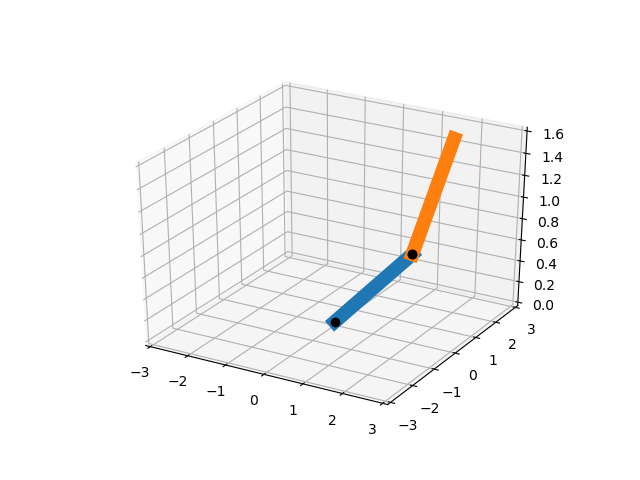

interactive(children=(FloatSlider(value=0.0, description='theta0', max=6.4, step=0.05), Output()), _dom_classe…

In [118]:
# 2-link 3D robot arm, widget

%matplotlib notebook
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

fig = plt.figure(' ')

ax = plt.axes(projection="3d")    # set up for 3D work

L1, = ax.plot3D([0,2],[0,0],[0, 1/2],linewidth=10)
J1, = ax.plot3D([0],[0],[0],'ko')
L2, = ax.plot3D([2,3],[0,0],[1/2,1.5], linewidth=10)
J2, = ax.plot3D([2,2],[0,0],[1/2,1/2],'ko')

ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_zlim([0,1.6])
plt.grid('on')

def update( theta0=widgets.FloatSlider(min=0, max=6.4, step=0.05, value=0) ):
    c = np.cos(theta0)
    s = np.sin(theta0)
    L1.set_data_3d([0,2*c],[0,2*s], [0,1/2])
    L2.set_data_3d([2*c,3*c], [2*s,3*s], [1/2,3/2])
    J2.set_data_3d([2*c,2*c], [2*s,2*s], [1/2,1/2])
    fig.canvas.draw_idle()

interact(update);

\begin{myfig}\label{fig:rob3w} Move my arms. \end{myfig}

## The Projective Plane

Overview

### The Classical Setting

We start with the **classical** set-up.

We place the (red) scene on the plane $z=z_0$, and the (blue) canvas on the plane $x=x_0$, and place the painter's (green) eye at the origin, $[0,0,0]$
and a pair of parallel (black) railroad tracks in our scene at $[x,\pm 1,z_0]$.

We compute the projection of the positive track onto the canvas. Each point from the eye to scene lies on the line

\begin{equation}\label{eq:proj0}
  t[x,y,z_0]
\end{equation}

This line hits the canvas when $tx=x_0$, i.e., when $t=x_0/x$, and so hits the canvas at

\begin{equation}\label{eq:projt}
    c = (x_0/x)[x, y, z_0]
\end{equation}

<IPython.core.display.Javascript object>


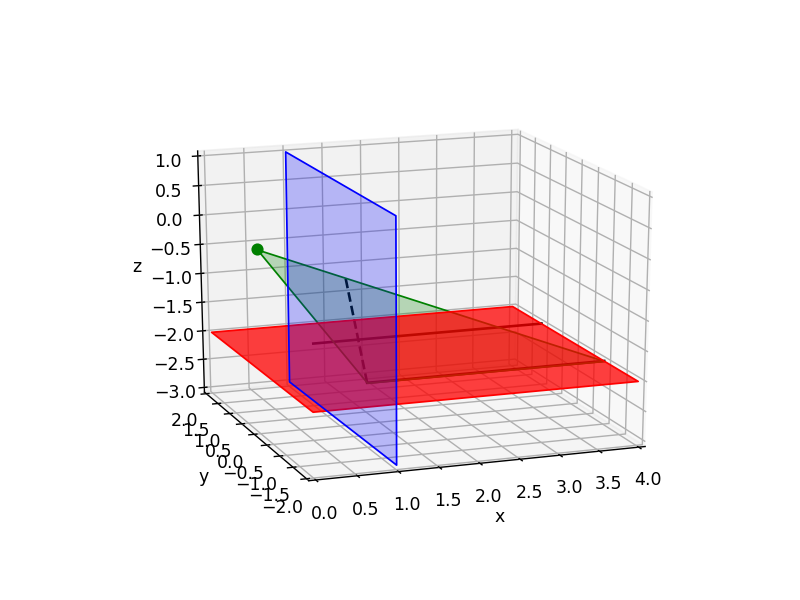

In [12]:
# painter perspective
%matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(elev = 18, azim = -110)

z0 = -2
# create the scene plane 
x = [0, 4, 4, 0]
y = [-2, -2, 2, 2]
z = [z0, z0, z0, z0]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'r', alpha = 0.75))

x0 = 1
# create the canvas plane 
x = [x0, x0, x0, x0]
y = [-2, -2, 2, 2]
z = [z0-1, z0+3, z0+3, z0-1]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'b', alpha = 0.25))

ax.plot([x0, 4], [-1, -1], [z0, z0], 'k')   # right track
ax.plot([x0, 4], [1, 1], [z0, z0], 'k')      # left track

ax.plot([0], [0], [0], 'go')   # the painter's eye
#ax.plot([0, x0], [0, 0], [0, 0], 'g')   # eye into picture

# create plane through eye and right track
x = [0, x0, 4]
y = [0, -1, -1]
z = [0, z0, z0]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'g', alpha = 0.25))

ax.plot([x0, x0], [-1, -x0/4], [z0, x0*z0/4], 'k--')   # right track projected 

ax.set_xlim(0, 4)
ax.set_ylim(-2, 2)
ax.set_zlim(z0-1, z0+3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

\begin{myfig}\label{fig:persp1} The black line in the red scene is projected onto the dashed black line on the blue canvas by following straight lines from the track to the painter's eye. Please run and rotate to explore the interplay of point, line, and plane. \end{myfig}

We next shift our perspective from painter to camera. In this case the canvas is the image plane behind the lens, as illustrated below.

<IPython.core.display.Javascript object>


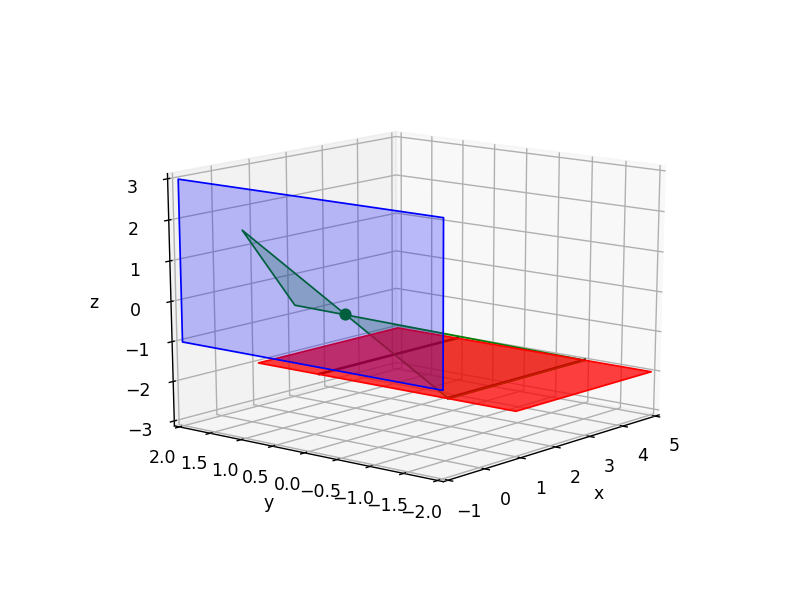

In [13]:
# camera perspective
%matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(elev = 18, azim = -110)

z0 = -2
# create the scene plane 
x = [0+1, 4+1, 4+1, 0+1]
y = [-2, -2, 2, 2]
z = [z0, z0, z0, z0]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'r', alpha = 0.75))

x0 = -1
# create the camera plane 
x = [x0, x0, x0, x0]
y = [-2, -2, 2, 2]
z = [z0-1+2, z0+3+2, z0+3+2, z0-1+2]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'b', alpha = 0.25))

ax.plot([1, 5], [-1, -1], [z0, z0], 'k')   # right track
ax.plot([1, 5], [1, 1], [z0, z0], 'k')      # left track

ax.plot([0], [0], [0], 'go')   # the camera lens

# create bowtie through eye and right track onto image plane
x = [0, 5, 1]
y = [0, -1, -1]
z = [0, z0, z0]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'g', alpha = 0.25))
x = [0, x0, x0]
y = [0, -x0, -x0/5]
z = [0, z0*x0, z0*x0/5]
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, color = 'g', alpha = 0.25))

ax.set_xlim(x0, 5)
ax.set_ylim(-2, 2)
ax.set_zlim(z0-1, z0+3+2)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

\begin{myfig}\label{fig:persp2} The black line in the red scene is projected onto the blue image plane by following straight lines from the track therough the camera's lens. Please run and rotate to explore the interplay of point, line, and plane. Do you see that the track is reflected in both the $y$ and $z$ directions in comparison with our previous figure? \end{myfig}

\begin{exercise}\label{ex:persp}
Modify the last two codes cells to add the green triangles associated with the projection of the other track.
\end{exercise}

### General Central Projections

We now consider the Central Projection (Fig. 70, page 168, Courant and Robbins) of the plane $\pi$ on to the plane $\pi'$ using the representations

$$
  \pi = \{p\in\maR^3:n^Tp = c\} = \{xa + yb + t: x\in\maR,\ y\in\maR\} \\
  \pi' = \{p'\in\maR^3:n'^Tp' = c'\} = \{ua' + vb' + t': u\in\maR,\ v\in\maR\}
$$

Now as the projection of $p$ is a point $p'$ on the line through $p$ it follows that

$$
  p' = \la p \implies c' = n'^Tp' = \la n'^Tp \implies \la = \frac{c'}{n'^Tp}
$$

that is,

$$
  p' = \frac{c'}{n'^Tp}p
$$

if we now invoke the basis representation this reads

$$
  ua' + vb' + t' = \frac{c'(xa + yb + t)}{xa^Tn' + yb^Tn' + t^Tn'}
$$

now taking the inner product of each side with $a'$ we find

$$
  u+a'^Tt' = \frac{c'(xa^Ta' + yb^Ta' + t^Ta')}{xa^Tn' + yb^Tn' + t^Tn'}
$$

and so

$$
  u = \frac{h_{0,0} x + h_{0,1} y + h_{0,2}}{h_{2,0} x + h_{2,1} y + h_{2,2}}
$$

and similarly

$$
  v = \frac{h_{1,0} x + h_{1,1} y + h_{1,2}}{h_{2,0} x + h_{2,1} y + h_{2,2}}
$$

that is, $(u,v)$ is a fractional linear transformation of $(x,y)$.

Equivalently,

\begin{equation}\label{eq:projH}
  \begin{pmatrix} u \\ v \\ w \end{pmatrix} 
   = \begin{pmatrix} h_{0,0} & h_{0,1} & h_{0,2} \\ h_{1,0} & h_{1,1} & h_{1,2} \\ h_{2,0} & h_{2,1} & h_{2,2} \end{pmatrix} \begin{pmatrix} x \\ y \\ 1 \end{pmatrix} = \begin{pmatrix} u/w \\ v/w \\ 1 \end{pmatrix}
\end{equation}



### Correcting the Camera

Need a more interesting scene...

We construct a Projective Transformation of the square

\begin{equation}\label{eq:sq0}
   (x_1,y_1) = (0,0) \\
   (x_2,y_2) = (1,0) \\
   (x_3,y_3) = (1,1) \\
   (x_4,y_4) = (0,1)
\end{equation}

to the perspectivized

\begin{equation}\label{eq:sq1}
   (x'_1,y'_1) = (0,0) \\
   (x'_2,y'_2) = (11/10,1/10) \\
   (x'_3,y'_3) = (11/10,9/10) \\
   (x'_4,y'_4) = (0,1)
\end{equation}

using $p' = Hp$ as above brings

\begin{equation}\label{eq:ptrans}
  x'_i(h_{31}x_i+h_{32}y_i+h_{33}) = h_{11}x_i+h_{12}y_i + h_{13} \\
  y'_i(h_{31}x_i+h_{32}y_i+h_{33}) = h_{21}x_i+h_{22}y_i + h_{23}
\end{equation}

If we stack these 4 sets of 2 we find a system for $H$

\begin{equation}\label{eq:H0}
 0 = h_{13} \\
 0 = h_{23} \\
 (11/10)(h_{31}+h_{33}) = h_{11}+h_{13} = h_{11}\\
 (1/10)(h_{31}+h_{33}) = h_{21}+h_{23} = h_{21} \\
 (11/10)(h_{31}+h_{32}+h_{33}) = h_{11}+h_{12} \\
 (9/10)(h_{31}+h_{32}+h_{33}) = h_{21}+h_{22} \\
 0 = h_{12} \\
 h_{32}+h_{33} = h_{22}
\end{equation}

or

\begin{equation}\label{eq:H1}
 (11/10)(h_{31}+h_{33}) =  h_{11}\\
 (1/10)(h_{31}+h_{33}) =  h_{21} \\
 (11/10)(h_{31}+h_{32}+h_{33}) = h_{11} \\
 (9/10)(h_{31}+h_{32}+h_{33}) = h_{21}+h_{22} \\
 h_{32}+h_{33} = h_{22}
\end{equation}

or

\begin{equation}\label{eq:HMAT}
\begin{pmatrix} -1 & 0 & 0 & 11/10 & 0 & 11/10 \\
0 & -1 & 0 & 1/10 & 0 & 1/10 \\
-1 & 0 & 0 & 11/10 & 11/10 & 11/10 \\
0 & -1 & -1 & 9/10 & 9/10 & 9/10 \\
0 & 0 & -1 & 0 & 1 & 1 \end{pmatrix}
\begin{pmatrix} h_{11} \\ h_{21} \\ h_{22} \\ h_{31} \\ h_{32} \\ h_{33} 
\end{pmatrix} =
\begin{pmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 
\end{pmatrix}
\end{equation}

upon row reduction we arrive at


\begin{equation}\label{eq:Hred}
\begin{pmatrix} -1 & 0 & 0 & 11/10 & 0 & 11/10 \\
0 & -1 & 0 & 1/10 & 0 & 1/10 \\
0 & 0 & 0 & 0 & 11/10 & 0 \\
0 & 0 & -1 & 8/10 & 9/10 & 8/10 \\
0 & 0 & 0 & -8/10 & 1/10 & 2/10 \end{pmatrix}
\end{equation}

On computing its null space we find

\begin{equation}\label{eq:Hfin}
H = \begin{pmatrix} 11 & 0 & 0 \\ 1 & 8 & 0 \\ 2 & 0 & 8 \end{pmatrix}
\end{equation}

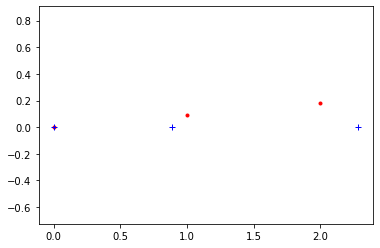

In [14]:
# now use it
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

H = np.array([[11,0,0],[1,8,0],[2,0,8]])
Hi = np.linalg.inv(H)

for x in range(3):
    y = x/11
    plt.plot(x,y,'r.')
    q = Hi@np.array([x,y,1])
    plt.plot(q[0]/q[2], q[1]/q[2], 'b+-')
        
plt.axis('equal');

See <a href="http://www.ams.org/publicoutreach/feature-column/fc-2013-03">Austin</a> for a more geometric approach.